In [16]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the working directory to your project folder.
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Econ_0150_Project/')


In [ ]:
# Check which files are in your Project folder
os.listdir()

['Project_Template.ipynb', 'UMCSENT.csv', 'GASREGW.csv', 'CPIUFDSL.csv']

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Read Consumer Sentiment
data = pd.read_csv('UMCSENT.csv')
display(data.head())

,observation_date,UMCSENT
0,2000-01-01,112.0
1,2000-02-01,111.3
2,2000-03-01,107.1
3,2000-04-01,109.2
4,2000-05-01,110.7


In [ ]:
# Read Gas Prices
data = pd.read_csv('GASREGW.csv')
display(data.head())

,observation_date,GASREGW
0,2000-01-01,1.289
1,2000-02-01,1.377
2,2000-03-01,1.516
3,2000-04-01,1.465
4,2000-05-01,1.487


In [ ]:
# Read Food Prices (Control Variable)
data = pd.read_csv('CPIUFDSL.csv')
display(data.head())

,observation_date,CPIUFDSL
0,2000-01-01,165.6
1,2000-02-01,166.2
2,2000-03-01,166.5
3,2000-04-01,166.7
4,2000-05-01,167.3


In [ ]:
df1 = pd.read_csv('GASREGW.csv')     # Gas prices
df2 = pd.read_csv('UMCSENT.csv')     # Consumer sentiment
df3 = pd.read_csv('CPIUFDSL.csv')    # Food price index (control)

In [ ]:
# merge data

# Merge gas + sentiment
merged_data = pd.merge(df1, df2, on='observation_date')

# Merge in food price control variable
merged_data = pd.merge(merged_data, df3, on='observation_date')


In [ ]:
# change in gas price (this month)
merged_data['change_gas'] = merged_data['GASREGW'].diff()

# change in consumer sentiment (following month)
merged_data['following_month_change_sentiment'] = merged_data['UMCSENT'].diff().shift(-1)

# change in food price (this month, control)
merged_data['change_food'] = merged_data['CPIUFDSL'].diff()

# Drop NA rows
merged_data = merged_data.dropna()

In [ ]:
display(merged_data.head())

,observation_date,GASREGW,UMCSENT,CPIUFDSL,change_gas,following_month_change_sentiment,change_food
1,2000-02-01,1.377,111.3,166.2,0.088,-4.2,0.6
2,2000-03-01,1.516,107.1,166.5,0.139,2.1,0.3
3,2000-04-01,1.465,109.2,166.7,-0.051,1.5,0.2
4,2000-05-01,1.487,110.7,167.3,0.022,-4.3,0.6
5,2000-06-01,1.633,106.4,167.4,0.146,1.9,0.1


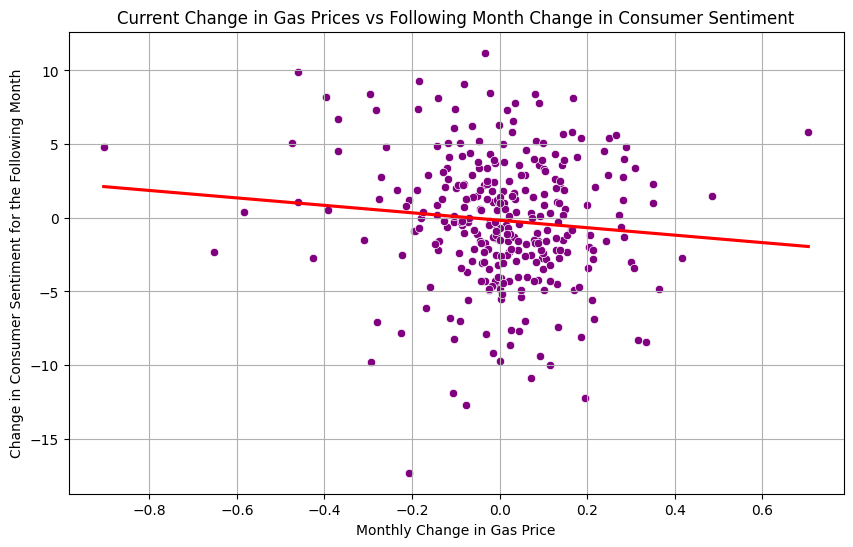

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='change_gas', y='following_month_change_sentiment', data=merged_data, color='purple')

#plt.title('Scatter Plot of Current Change in Gas Prices vs Following Month\'s Change in Consumer Sentiment')
plt.grid(True)
sns.regplot(x='change_gas', y='following_month_change_sentiment', data=merged_data, color='red', ci=None, scatter=False)
plt.xlabel('Monthly Change in Gas Price')
plt.ylabel('Change in Consumer Sentiment for the Following Month')
plt.title('Current Change in Gas Prices vs Following Month Change in Consumer Sentiment')
plt.show()

In [ ]:
model_1 = smf.ols(formula='following_month_change_sentiment ~ change_gas', data=merged_data).fit()

print(model_1.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1679      0.247     -0.680      0.497      -0.654       0.318
change_gas    -2.5271      1.436     -1.759      0.080      -5.353       0.299


In [ ]:
model_2 = smf.ols(formula='following_month_change_sentiment ~ change_gas + change_food',data=merged_data).fit()

print(model_2.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1153      0.324      0.355      0.723      -0.523       0.754
change_gas     -2.5488      1.435     -1.777      0.077      -5.372       0.274
change_food    -0.4948      0.369     -1.342      0.181      -1.220       0.231


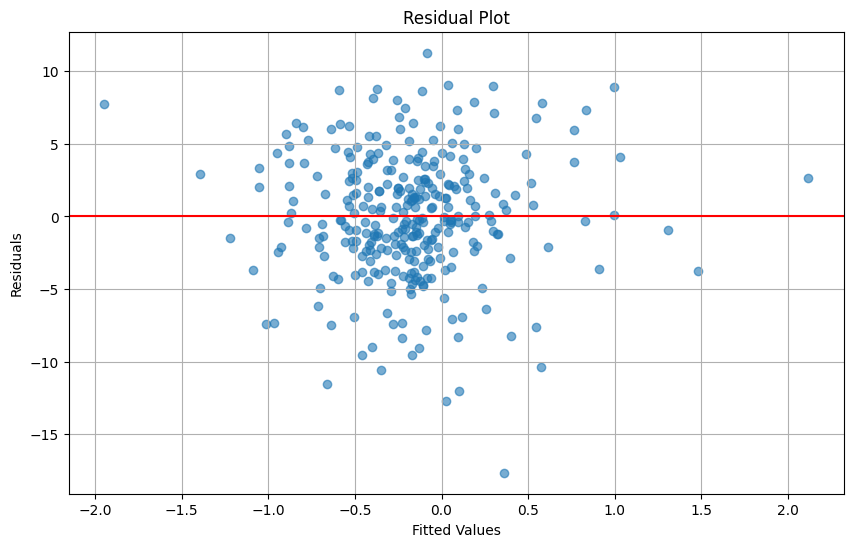

In [ ]:
# Residual plot

# Extract residuals and fitted values
residuals = model_1.resid
fitted = model_1.fittedvalues

plt.figure(figsize=(10,6))
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(color='red')

plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()